<b>### APLIKASI ANALISIS GEOSPASIAL REGRESI MULTI SKALA / Aplikasi AGRMS 1.0 ###</b>

Aplikasi ini bertujuan untuk mengolah data raster dan vektor data geospasial untuk mendapatkan regresi untuk hubungan terhadap sebuah parameter yang independent.

Dalam aplikasi ini menggunakan data-data yang bersumber dari data open-source, peta rupa bumi Indonesia, dan peta wilayah administrasi dari BPS. Adapun data-data raster input adalah:

1.	Kedalaman lapisan pembatas akar/ Root restricting layer depth (depth_to_root_rest_layer,  mm) 
2.	Fraksi (fractp ): Estimasi fraksi evapotranspirasi sebenarnya dari presipitasi per piksel/ Estimated actual evapotranspiration fraction of precipitation per pixel 
(Actual Evapotranspiration / Precipitation). It is the mean fraction of precipitation that actually evapotranspires at the pixel level. 
3.	Kandungan Air Tersedia Tanaman/ Plant Available Water Content (pawc),  PAWC is a fraction from 0 to 1. 
4.	Presipitasi/ Precipitation (precip, mm) 
5.	Rata-rata Evapotranspirasi Referensi Tahunan (eto, mm). Evapotranspirasi acuan tahunan rata-rata (Eto). Eto , adalah energi (dinyatakan sebagai kedalaman air, misalnya mm) yang disediakan oleh matahari (dan terkadang angin) untuk menguapkan air.
6.	Rata-rata evapotranspirasi aktual per piksel pada subDAS/ AET_mn (mm): Mean actual evapotranspiration per pixel on the subwatershed. 
7.	Raster data ketinggian digital/ Digital Elevation Meter (DEM)
8. Data keluaran dari aplikasi INVEST yaitu data hasil air/ ESTIMATED WATER YIELD.
9. Data vektor batas kecamatan

Fitur yang ada di aplikasi ini:
1. Otomatisasi input raster untuk dimasukkan ke input Analisis Geospasial Regresi Multi skala.
2. Peta dalam bentuk grafik otomatis disimpan dalam bentuk PNG.
3. Tampilan keluaran peta per kecamatan dalam ditampilkan secara otomatis menggunakan Google Earth Engine.

Cara Instalasi
A. Instalasi Anaconda dan paket pendukung.
1. Instalasi Anaconda dari https://www.anaconda.com/
2. Instalasi Visual Code dari https://code.visualstudio.com/
3. Copy master repository ini dan ekstract.
4. Buat Enviroment Anaconda dengan nama "mgwr38-GEEMAP"
5. instalasi paket pendukung di perintah pip. pip install -r requirements.txt
6. Jika ada masalah mengenai GEEMAP, silahkan membaca https://geemap.org/.
7. Jika ada masalah mengenai MGWR, silahkan membaca https://mgwr.readthedocs.io/en/latest/.
8. Untuk menghasilkan data keluaran dari aplikasi INVEST, silahkan membaca https://invest-userguide.readthedocs.io/en/latest/annual_water_yield.html.
9. Untuk contoh Daerah Aliran Sungai Citarum, bisa membaca dan mensitasi: Spatial-Temporal Changes in Water Supply and Demand in the Citarum Watershed, West Java, Indonesia Using a Geospatial Approach. https://www.mdpi.com/2071-1050/15/1/562 

Cara Penggunaan
1. Aktifkan akun Google Earth Engine di peramban chrome.
2. Buka file mgwr_raster.py versi terakhir menggunakan Visual Code. Pastikan Kernel adalah mgwr38-GEEMAP
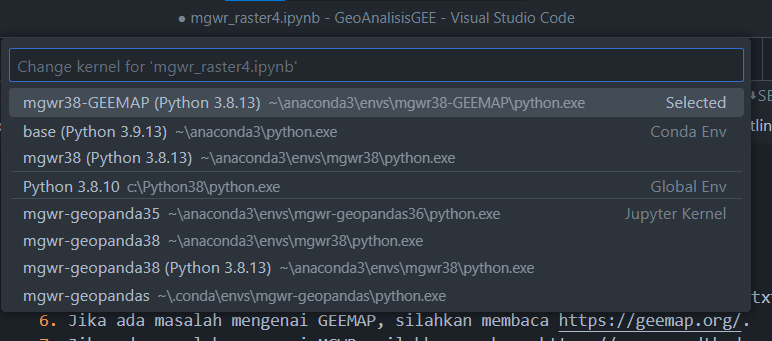
3. Jalankan satu-satu sesuai arahan di halaman jupyter.
4. Jika ada masalah, silahkan kontak pembangun aplikasi ini. 

#### SELAMAT MENCOBA ####



Inisiasi paket python: paket sistem, geopandas, rasterio, pandas, pyplot, mgwr, dan glob. Inisiasi Geemap dilakukan setelah mgwr telah dilakukan

In [1]:
import os
import sys
import time
import argparse
import geopandas as gpd
import fiona
import rasterio as rio
from rasterstats import zonal_stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from datetime import datetime
import glob
import pathlib


Inisiasi nama folder input dan output. Pastikan sudah sesuai dengan folder asli:

input -> rasterparameter

input -> rasterhasil


input -> vektor

output -> png

output -> shp
       

In [2]:
#ambil nama folder root
folder_root = os.getcwd()
print(folder_root)

#ambil nama folder input
folder_input =  os.path.join(folder_root, 'input')
print(folder_input)

#ambil nama folder output
folder_output =  os.path.join(folder_root, 'output')
print(folder_output)

e:\citarum\GeoAnalisisGEE
e:\citarum\GeoAnalisisGEE\input
e:\citarum\GeoAnalisisGEE\output


Ambil data shp kecamatan di DAS Citarum dalam proyeksi UTM 49S

In [3]:
#nama sumber shp kecamatan
kecamatan_polygon_file = os.path.join(folder_input, 'vektor', 'batas_kecamatan_citarum_48S.shp')
print(kecamatan_polygon_file)
# masukkan shp ke geopanda format
kecamatan_gpd = gpd.read_file(kecamatan_polygon_file)

e:\citarum\GeoAnalisisGEE\input\vektor\batas_kecamatan_citarum_48S.shp


Ambil data raster secara otomatis di folder input>rasterparameter, dan rasterhasil

In [4]:
#ambil nama file raster parameter
list_raster_file = glob.glob(os.path.join(folder_root, 'input', 'rasterparameter', '*.tif'))
df_raster_file = pd.DataFrame(list_raster_file)
df_raster_file = df_raster_file.astype('string')
#df_raster_file.head(5)

# ambil nama file raster hasil
filehasil = os.path.join(folder_input, 'rasterhasil', '2020_wateryield_new.tif')
new_row = pd.DataFrame({0:filehasil},index =[0])
df_raster_file = pd.concat([new_row, df_raster_file]).reset_index(drop = True)
#df_raster_file.head(5)

# print(df_raster_file)
# print(len(df_raster_file))
# list(df_raster_file)
df_raster_file.rename(columns = {0:'filenamelong'}, inplace = True)
df_raster_file['filename'] = df_raster_file["filenamelong"].str.split("\\").str[-1]
df_raster_file['parameter'] = df_raster_file["filename"].str.split(".").str[0]
jumlahparameter = len(df_raster_file.index)
print('Jumlah Parameter Hasil: ' + str(1))
print('Jumlah Parameter Input: ' + str(jumlahparameter-1))
print(df_raster_file)

Jumlah Parameter Hasil: 1
Jumlah Parameter Input: 6
                                        filenamelong                 filename  \
0  e:\citarum\GeoAnalisisGEE\input\rasterhasil\20...  2020_wateryield_new.tif   
1  e:\citarum\GeoAnalisisGEE\input\rasterparamete...             2020_dem.tif   
2  e:\citarum\GeoAnalisisGEE\input\rasterparamete...   2020_depth_to_root.tif   
3  e:\citarum\GeoAnalisisGEE\input\rasterparamete...             2020_eto.tif   
4  e:\citarum\GeoAnalisisGEE\input\rasterparamete...          2020_fractp.tif   
5  e:\citarum\GeoAnalisisGEE\input\rasterparamete...            2020_pawc.tif   
6  e:\citarum\GeoAnalisisGEE\input\rasterparamete...   2020_precipitation.tif   

             parameter  
0  2020_wateryield_new  
1             2020_dem  
2   2020_depth_to_root  
3             2020_eto  
4          2020_fractp  
5            2020_pawc  
6   2020_precipitation  


Analisis Geospasial menggunakan metode rata-rata per piksel untuk masing - masing polygon kecamatan

In [5]:
vars = []
zstats_merged = []

for ind in df_raster_file.index:
    raster_data = rio.open(df_raster_file['filenamelong'][ind], "r")  
    parameter = df_raster_file["parameter"][ind]
    print(parameter)
    profile = raster_data.profile
    transform = profile['transform']
    nodata = raster_data.nodata

    img = raster_data.read(1)
    img = img.astype('float32') 
    img[img==nodata] = np.nan
    zstats = zonal_stats(kecamatan_gpd, img, affine=transform, prefix= f'{parameter}_', nodata=nodata, stats='mean')
    zstats_merged.append(zstats) # zstats_merged is now a 2D list of lists [bands, shapes]
    vars.append(f'{parameter}_mean')
 

2020_wateryield_new
2020_dem
2020_depth_to_root
2020_eto
2020_fractp
2020_pawc
2020_precipitation


Menggabungkan data-data raster ke satu dataframe/ table
Sekaligus, mengekspor data tersebut ke data_raw.csv untuk pengecekan.

In [6]:
# Flip the dimensions using zip
zstats_merged_list = list(zip(*zstats_merged))
# Aggregate into a single list (dimension: shapes) containing bands
final_zstats = [{k: v for d in s for k, v in d.items()} for s in zstats_merged_list]
# Convert zonal statistic results to pandas dataframe
df_zstats = pd.DataFrame(final_zstats)
print(df_zstats)
#expor ke data_raw.csv
pd.DataFrame(df_zstats).to_csv('data_raw.csv') 

     2020_wateryield_new_mean  2020_dem_mean  2020_depth_to_root_mean  \
0                 1758.581542    1828.489958               705.217391   
1                  781.105326    1627.636282              1500.000000   
2                  963.671514     665.539128              1412.689719   
3                 1849.954677     129.303446               921.150943   
4                 1184.546386     337.857809               842.123532   
..                        ...            ...                      ...   
170                791.291059     891.738573               500.000000   
171                690.660874     720.564805               534.891394   
172                653.810418     743.846073               503.422841   
173                572.529404     819.830372               500.000000   
174                322.498735     216.945913               950.008560   

     2020_eto_mean  2020_fractp_mean  2020_pawc_mean  2020_precipitation_mean  
0       872.420172          0.241516       

Menghitung korelasi spasial dengan MGWR. 

Perkiraan membutuhan dua menit di mesin i7 8th Gen dan RAM 24GB.

In [7]:
 # Merge zones and zonal statistics data frame
kecamatan_gpd_output = gpd.read_file(kecamatan_polygon_file)
kecamatan_gpd_output['x_utm'] = kecamatan_gpd_output.centroid.x
kecamatan_gpd_output['y_utm'] = kecamatan_gpd_output.centroid.y
kecamatan_gpd_output = kecamatan_gpd_output.join(df_zstats)

# Clean the data
kecamatan_gpd_output = kecamatan_gpd_output.dropna()
print('Jumlah data input (170 kecamatan): {}'.format(kecamatan_gpd_output.shape))

# Prepare datasets input
y = kecamatan_gpd_output[vars[0]].values.reshape((-1,1))
X = kecamatan_gpd_output[list(vars[1:])].values
coords = list(zip(kecamatan_gpd_output['x_utm'],kecamatan_gpd_output['y_utm']))

print('Jumlah Variabel Parameter: {}'.format(X.shape))
print('Jumlah Variabel Input: {}'.format(y.shape))

X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean(axis=0)) / y.std(axis=0)

# Calibrate MGWR model
print('Proses AGMRS dimulai ....')
start_time = time.time()
mgwr_selector = Sel_BW(coords, y, X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print('MGWR bandwidth: {}'.format(mgwr_bw))
mgwr_results = MGWR(coords, y, X, mgwr_selector).fit()
mgwr_results.summary()
elapsed_time = (time.time() - start_time)/60
print('Proses AGMRS selesai. Waktu yang dibutuhkan (menit): '+str(elapsed_time))


Jumlah data input (170 kecamatan): (170, 22)
Jumlah Variabel Parameter: (170, 6)
Jumlah Variabel Input: (170, 1)
Proses AGMRS dimulai ....


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

MGWR bandwidth: [169. 156. 169. 169.  13.  27. 164.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Model type                                                         Gaussian
Number of observations:                                                 170
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              3.151
Log-likelihood:                                                      97.763
AIC:                                                               -181.527
AICc:                                                              -178.632
BIC:                                                               -833.984
R2:                                                                   0.981
Adj. R2:                                                              0.981

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

Menyiapkan data untuk ditampilkan di peta PNG dan ke shapefile.

In [9]:
print('Menyiapkan hasil AGMRS untuk pemetaan di PNG dan GEEMAP ...')
# Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()
# Plot MGWR parameters
for i in range(0, jumlahparameter):
    if i==0:
        param = 'mgwr_intercept'
        namafile = 'mgwr_hasil-' + df_zstats.columns[i]
    
    else:
        param = f'mgwr_b{i}'
        namafile = f'mgwr_b{i}-' + df_zstats.columns[i]
    
    print('Cetak PNG: ' + namafile)

    # Add MGWR parameters to GeoDataframe
    kecamatan_gpd_output[param] = mgwr_results.params[:,i-1]
    
    # Set color map
    vmin = kecamatan_gpd_output[param].min()
    vmax = kecamatan_gpd_output[param].max()
    cmap = plt.cm.seismic

    # Create scalar mappable for colorbar and stretch colormap across range of data values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # Plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(8, 6)
    ax.set_title(param, fontsize=10)
    kecamatan_gpd_output.plot(column=param,
        ax=ax,
        legend=True,
        cmap=sm.cmap, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
    if (mgwr_filtered_t[:,0] == 0).any(): #If there are insignificant parameters plot gray polygons over them
        kecamatan_gpd_output[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax, **{'edgecolor':'black'})
    plt.savefig(folder_output+ '\\png\\'+ namafile +'.png', dpi=300)
    plt.close()

print('Simpan output ke shapefile ....')
with fiona.Env(OSR_WKT_FORMAT='WKT2_2018'):
    kecamatan_gpd_output.to_file(folder_output+ '\\shp\\output1.shp')

print('{} - Selesai!'.format(datetime.now()))

Menyiapkan hasil AGMRS untuk pemetaan di PNG dan GEEMAP ...
Cetak PNG: mgwr_hasil-2020_wateryield_new_mean
Cetak PNG: mgwr_b1-2020_dem_mean
Cetak PNG: mgwr_b2-2020_depth_to_root_mean
Cetak PNG: mgwr_b3-2020_eto_mean
Cetak PNG: mgwr_b4-2020_fractp_mean
Cetak PNG: mgwr_b5-2020_pawc_mean
Cetak PNG: mgwr_b6-2020_precipitation_mean
Simpan output ke shapefile ....
2023-01-22 14:42:04.490821 - Selesai!


C:\Users\fardh\AppData\Local\Temp\ipykernel_25376\992097609.py:42: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  kecamatan_gpd_output.to_file(folder_output+ '\\shp\\output1.shp')


jika Sudah selesai, tampilan folder hasil png adalah sebagai berikut:
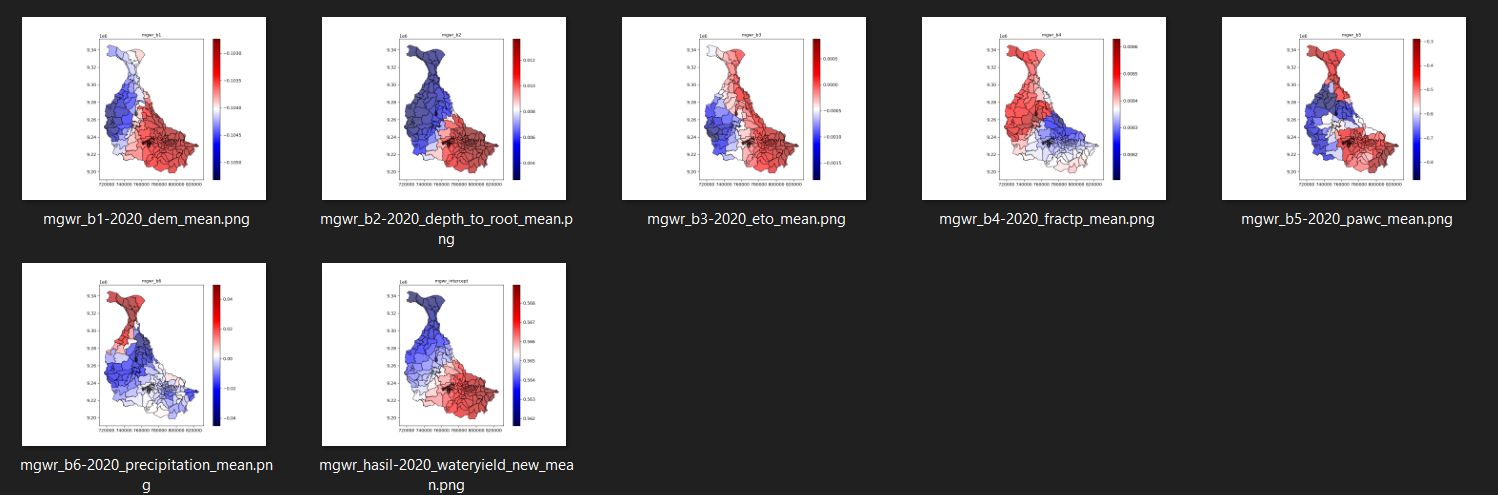

Tampilan GEEMAP bisa dijalankan di mgwr_geemap1.ipynb